In [10]:
#!/usr/bin/env python
# coding: utf-8
__docformat__ = 'reStructuredText'
###########################################
# Imports
###########################################
import sys #to put the SCM into the PYTHONPATH
sys.path.append('../../library/scm/')

from sys import exit
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import scipy.signal
from scipy.interpolate import interp1d
import xarray as xr
import time as TIME

# plt.rcParams['text.usetex'] = False
# plt.rcParams.update({'font.size': 22})
# plt.rcParams.update({'figure.facecolor': 'white'})
# plt.rcParams.update({'savefig.facecolor': 'white'})
# plt.rcParams.update({'lines.linewidth': 3.0})
#plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.facecolor':'white'})
plt.rcParams.update({'savefig.facecolor':'white'})
###########################################



#===========================================================================
#case = 'FC500'
case = 'WANG1_FR'


saving_path = '../../figures/SCM_LES_comparison/'
saving_name = case+'72h_profile_LES_vs_EDMF.png'

models = ['CROCO','MNH'] 
###############################
les = {}
LG_MEAN={}
LG_RES={}
LG_SBG={}
BU_KE={}
TH_les={}
U_les={}
V_les={}
U_avg={}
V_avg={}
WTH={}
WU={}
WV={}
TKE={}
WTKE={}
z_r = {}

# Opening MNH
print('Opening MNH')
model = 'MNH'
file = 'GN_01.1.OC_01.000.nc'
path = '../../tests/data/'+case+'/'
les[model] = xr.open_dataset(path+file)
LG_MEAN[model]= xr.open_dataset(path+file,group ='/LES_budgets/Mean/Cartesian/Not_time_averaged/Not_normalized/cart')
LG_RES[model] = xr.open_dataset(path+file,group ='/LES_budgets/Resolved/Cartesian/Not_time_averaged/Not_normalized/cart')    
LG_SBG[model] = xr.open_dataset(path+file,group ='/LES_budgets/Subgrid/Cartesian/Not_time_averaged/Not_normalized/cart')
BU_KE [model] = xr.open_dataset(path+file,group ='/LES_budgets/BU_KE/Cartesian/Not_time_averaged/Not_normalized/cart')
TH_les[model] = (LG_MEAN[model].MEAN_TH - 273.15)
U_les [model] = (LG_MEAN[model].MEAN_U)
V_les [model] = (LG_MEAN[model].MEAN_V)
U_avg [model] = U_les[model].mean(dim='time_les')
V_avg [model] = V_les[model].mean(dim='time_les')
WTH   [model] = (LG_RES[model].RES_WTH + LG_SBG[model].SBG_WTHL)
WU    [model] = (LG_RES[model].RES_WU  + LG_SBG[model].SBG_WU)
WV    [model] = (LG_RES[model].RES_WV  + LG_SBG[model].SBG_WV)
TKE   [model] = (LG_RES[model].RES_KE  + LG_SBG[model].SBG_TKE) 
WTKE  [model] = (LG_RES[model].RES_WKE + LG_SBG[model].SBG_WTKE)
z_r[model] = (les[model].level_les - (les[model].level_les[0] + les[model].level_les[-1])).data


# Opening CROCO
print('Opening CROCO')
model='CROCO'
file = 'croco_wang1_diags_full.nc'
path = '../data/'+case+'/'
les[model] = xr.open_dataset(path+file)
TH_les[model] = les['CROCO']['mean_theta']
U_les [model] = les['CROCO']['mean_u']   
V_les [model] = les['CROCO']['mean_v']
U_avg [model] = U_les[model].mean(dim='time')
V_avg [model] = V_les[model].mean(dim='time')
WTH   [model] = les['CROCO']['res_wt']+les['CROCO']['sbg_wt']
WU    [model] = les['CROCO']['res_wu']+les['CROCO']['sbg_wu']
WV    [model] = les['CROCO']['res_wv']+les['CROCO']['sbg_wv']
TKE   [model] = les['CROCO']['res_tke']+les['CROCO']['sbg_tke']
WTKE  [model] = les['CROCO']['res_wtke']+les['CROCO']['sbg_wtke']
z_r[model] = les[model]['z_r']


instant=91
mld=3000
def plot_instant_panel(instant=instant):

    instant_model = {'CROCO': instant+1,'MNH': instant} # CROCO starts at t=0, MNH at t=1h...

    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1

    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_xlabel(r'$^{\circ}{\rm C}$')
    ax.set_ylabel(r'$z / h $')
    ax.set_title(r'$\overline{\theta}$')
    ax.set_xlim(2.989,3)

    for model in models:
        ax.plot(TH_les[model][instant_model[model]], z_r[model]/mld, color=colors[model],label=model)



    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{u}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')


    for model in models:
        ax.plot(U_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))

    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{v}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(V_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])     

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime \theta^\prime}$')
    
    for model in models:
        ax.plot(WTH[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm K}\;{\rm m}\;{\rm s}^{-1}$')

    # ===============================================================
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$k$')


    for model in models:
        ax.plot(TKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))


    ax.set_xlabel(r'${\rm m}^2\;{\rm s}^{-2}$')
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{w^\prime \frac{u^{\prime 2}}{2}  }$')


    for model in models:
        ax.plot(WTKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m}^3\;{\rm s}^{-3}$')


    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime u^\prime}$')
    

    for model in models:
        ax.plot(WU[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

    # ===============================================================
        # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime v^\prime}$')
    

    for model in models:
        ax.plot(WV[model][instant_model[model]], z_r[model]/mld, color=colors[model])
        

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

 

    # adding subplot labels
    subplot_label = [r'\rm{(a)}', r'\rm{(b)}', r'\rm{(c)}',
                    r'\rm{(d)}', r'\rm{(e)}', r'\rm{(f)}',r'\rm{(g)}',r'\rm{(h)}',r'\rm{(i)}',r'\rm{(j)}',r'\rm{(k)}',r'\rm{(l)}']

    for i,ax in enumerate(axes.flat):
        ax.set_ylim((-1, 0))
        # ax.set_box_aspect(1)
        ax.text(0.15, 0.98, subplot_label[i], transform=ax.transAxes,
               bbox=dict(facecolor='1.', edgecolor='none', pad=3.0), fontweight='bold', va='top', ha='right')




    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
        0.5, -0.05), fancybox=False, shadow=False, ncol=4)

    # fig.tight_layout()

    # saving_path = '../figures/'
    # # saving_name = 'WANG1_NR_FR_profiles.png'    
    # plt.savefig(saving_path+saving_name, bbox_inches='tight', dpi=300)
    # print('figure saved at'+saving_path+saving_name)
def plot_mean_velocities():
    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1
    # ===============================================================
    
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{u}$')
    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(U_avg[model], z_r[model]/mld, color=colors[model],label=model)

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    # ===============================================================
    
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{v}$')
    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(V_avg[model], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
        0.5, -0.05), fancybox=False, shadow=False, ncol=4)



Opening MNH
Opening CROCO


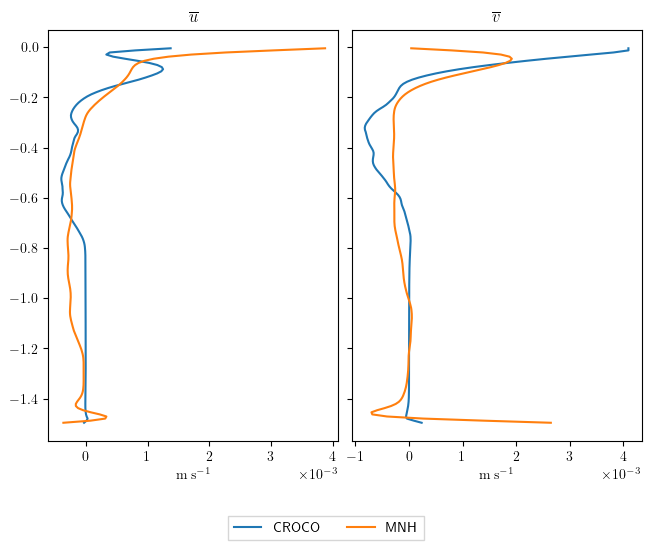

In [11]:
plot_mean_velocities()

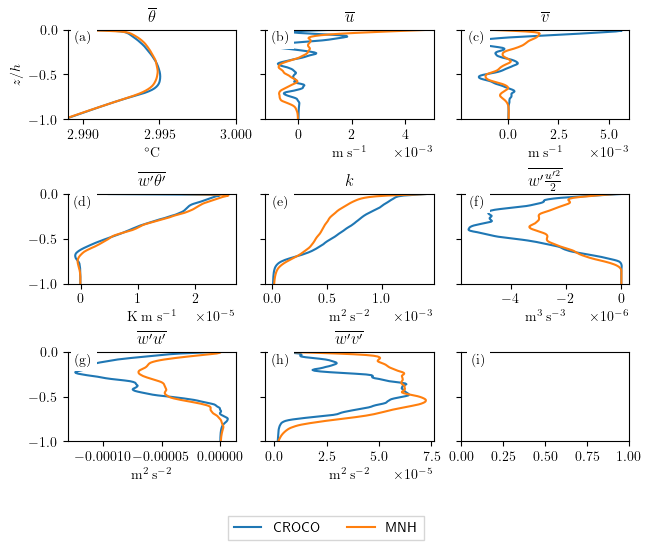

In [14]:
plot_instant_panel(instant=instant-1)

Opening MNH
Opening CROCO


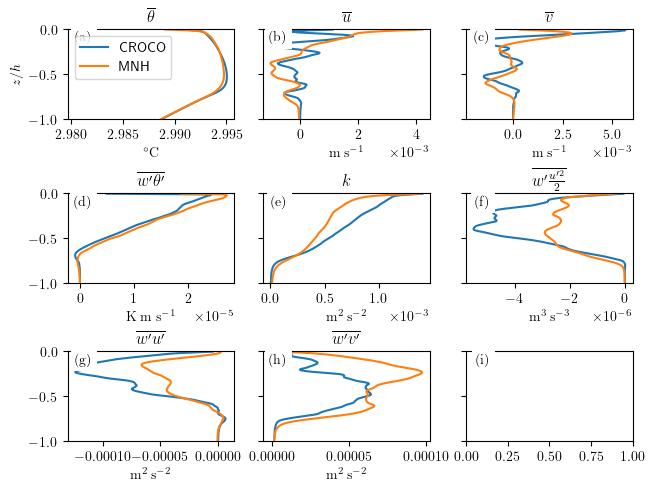

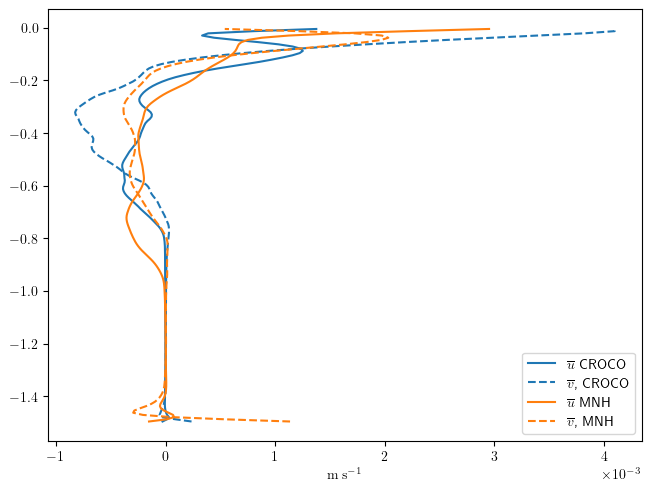

In [5]:
#!/usr/bin/env python
# coding: utf-8
__docformat__ = 'reStructuredText'
###########################################
# Imports
###########################################
import sys #to put the SCM into the PYTHONPATH
sys.path.append('../../library/scm/')

from sys import exit
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import scipy.signal
from scipy.interpolate import interp1d
import xarray as xr
import time as TIME

# plt.rcParams['text.usetex'] = False
# plt.rcParams.update({'font.size': 22})
# plt.rcParams.update({'figure.facecolor': 'white'})
# plt.rcParams.update({'savefig.facecolor': 'white'})
# plt.rcParams.update({'lines.linewidth': 3.0})
#plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.facecolor':'white'})
plt.rcParams.update({'savefig.facecolor':'white'})
###########################################



#===========================================================================
#case = 'FC500'
# case = 'WANG1_FR_lat30'
case = 'WANG1_FR_lat60'


saving_path = '../../figures/SCM_LES_comparison/'
saving_name = case+'72h_profile_LES_vs_EDMF.png'

models = ['CROCO','MNH'] 
avg_start=0
avg_end=134
###############################
les = {}
LG_MEAN={}
LG_RES={}
LG_SBG={}
BU_KE={}
TH_les={}
U_les={}
V_les={}
U_avg={}
V_avg={}
WTH={}
WU={}
WV={}
TKE={}
WTKE={}
z_r = {}

# Opening MNH
print('Opening MNH')
model = 'MNH'
file = 'GN_01.1.OC_01.000.nc'
path = '../../tests/data/'+case+'/'
les[model] = xr.open_dataset(path+file)
LG_MEAN[model]= xr.open_dataset(path+file,group ='/LES_budgets/Mean/Cartesian/Not_time_averaged/Not_normalized/cart')
LG_RES[model] = xr.open_dataset(path+file,group ='/LES_budgets/Resolved/Cartesian/Not_time_averaged/Not_normalized/cart')    
LG_SBG[model] = xr.open_dataset(path+file,group ='/LES_budgets/Subgrid/Cartesian/Not_time_averaged/Not_normalized/cart')
BU_KE [model] = xr.open_dataset(path+file,group ='/LES_budgets/BU_KE/Cartesian/Not_time_averaged/Not_normalized/cart')
TH_les[model] = (LG_MEAN[model].MEAN_TH - 273.15)
U_les [model] = (LG_MEAN[model].MEAN_U)
V_les [model] = (LG_MEAN[model].MEAN_V)
U_avg [model] = U_les[model][avg_start:avg_end].mean(dim='time_les')
V_avg [model] = V_les[model][avg_start:avg_end].mean(dim='time_les')
WTH   [model] = (LG_RES[model].RES_WTH + LG_SBG[model].SBG_WTHL)
WU    [model] = (LG_RES[model].RES_WU  + LG_SBG[model].SBG_WU)
WV    [model] = (LG_RES[model].RES_WV  + LG_SBG[model].SBG_WV)
TKE   [model] = (LG_RES[model].RES_KE  + LG_SBG[model].SBG_TKE) 
WTKE  [model] = (LG_RES[model].RES_WKE + LG_SBG[model].SBG_WTKE)
z_r[model] = (les[model].level_les - (les[model].level_les[0] + les[model].level_les[-1])).data


# Opening CROCO
print('Opening CROCO')
model='CROCO'
file = 'CROCO_'+case+'.nc'
path = '../data/'+case+'/'
les[model] = xr.open_dataset(path+file)
TH_les[model] = les['CROCO']['mean_theta']
U_les [model] = les['CROCO']['mean_u']   
V_les [model] = les['CROCO']['mean_v']
U_avg [model] = U_les[model][avg_start:avg_end].mean(dim='time')
V_avg [model] = V_les[model][avg_start:avg_end].mean(dim='time')
WTH   [model] = les['CROCO']['res_wt']+les['CROCO']['sbg_wt']
WU    [model] = les['CROCO']['res_wu']+les['CROCO']['sbg_wu']
WV    [model] = les['CROCO']['res_wv']+les['CROCO']['sbg_wv']
TKE   [model] = les['CROCO']['res_tke']+les['CROCO']['sbg_tke']
WTKE  [model] = les['CROCO']['res_wtke']+les['CROCO']['sbg_wtke']
z_r[model] = les[model]['z_r']


instant=90
mld=3000
def plot_instant_panel(instant=instant):

    instant_model = {'CROCO': instant+1,'MNH': instant} # CROCO starts at t=0, MNH at t=1h...

    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1

    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_xlabel(r'$^{\circ}{\rm C}$')
    ax.set_ylabel(r'$z / h $')
    ax.set_title(r'$\overline{\theta}$')
    # ax.set_xlim(2.989,3)
    for model in models:
        # model='CROCO'
        ax.plot(TH_les[model][instant_model[model]], z_r[model]/mld, color=colors[model],label=model)
    ax.legend()
    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{u}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')


    for model in models:
        ax.plot(U_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))

    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{v}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(V_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])     

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime \theta^\prime}$')
    
    for model in models:
        ax.plot(WTH[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm K}\;{\rm m}\;{\rm s}^{-1}$')

    # ===============================================================
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$k$')


    for model in models:
        ax.plot(TKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))


    ax.set_xlabel(r'${\rm m}^2\;{\rm s}^{-2}$')
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{w^\prime \frac{u^{\prime 2}}{2}  }$')


    for model in models:
        ax.plot(WTKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m}^3\;{\rm s}^{-3}$')


    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime u^\prime}$')
    

    for model in models:
        ax.plot(WU[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

    # ===============================================================
        # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime v^\prime}$')
    

    for model in models:
        ax.plot(WV[model][instant_model[model]], z_r[model]/mld, color=colors[model])
        

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

 

    # adding subplot labels
    subplot_label = [r'\rm{(a)}', r'\rm{(b)}', r'\rm{(c)}',
                    r'\rm{(d)}', r'\rm{(e)}', r'\rm{(f)}',r'\rm{(g)}',r'\rm{(h)}',r'\rm{(i)}',r'\rm{(j)}',r'\rm{(k)}',r'\rm{(l)}']

    for i,ax in enumerate(axes.flat):
        ax.set_ylim((-1, 0))
        # ax.set_box_aspect(1)
        ax.text(0.15, 0.98, subplot_label[i], transform=ax.transAxes,
               bbox=dict(facecolor='1.', edgecolor='none', pad=3.0), fontweight='bold', va='top', ha='right')




    # handles, labels = axes.flat[0].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
    #     0.5, -0.05), fancybox=False, shadow=False, ncol=4)
    plt.show()
    # fig.tight_layout()

    # saving_path = '../figures/'
    # # saving_name = 'WANG1_NR_FR_profiles.png'    
    # plt.savefig(saving_path+saving_name, bbox_inches='tight', dpi=300)
    # print('figure saved at'+saving_path+saving_name)
def plot_mean_velocities():
    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1
    # ===============================================================
    
    ax_index+=1
    # ax = axes.flat[ax_index]
    ax=axes
    # ax.set_title(r'$\overline{u}$')
    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(U_avg[model], z_r[model]/mld, color=colors[model],linestyle='-',label=r'$\overline{u}$ '+model)
        ax.plot(V_avg[model], z_r[model]/mld, color=colors[model],linestyle='--',label=r'$\overline{v}$, '+model)

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.legend()
    # ===============================================================
    
    # ax_index+=1
    # ax = axes.flat[ax_index]
    # ax.set_title(r'$\overline{v}$')
    # ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    # for model in models:
    #     ax.plot(V_avg[model], z_r[model]/mld, color=colors[model])

    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    # handles, labels = axes.flat[0].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
    #     0.5, -0.05), fancybox=False, shadow=False, ncol=4)
    plt.show()

plot_instant_panel(instant=90)
plot_mean_velocities()

In [3]:
les['CROCO']

<xarray.Dataset>
Dimensions:     (z_w: 181, z_r: 180, time: 135)
Coordinates:
  * z_w         (z_w) float64 -4.5e+03 -4.475e+03 -4.45e+03 ... -50.0 -25.0 0.0
  * z_r         (z_r) float64 -4.488e+03 -4.462e+03 -4.438e+03 ... -37.5 -12.5
Dimensions without coordinates: time
Data variables: (12/20)
    mean_theta  (time, z_r) float64 ...
    mean_u      (time, z_r) float64 ...
    mean_v      (time, z_r) float64 ...
    mean_w      (time, z_r) float64 ...
    sbg_tke     (time, z_r) float64 ...
    res_tke     (time, z_r) float64 ...
    ...          ...
    res_wt      (time, z_r) float64 ...
    sbg_wt      (time, z_r) float64 ...
    sbg_wu      (time, z_r) float64 ...
    sbg_wv      (time, z_r) float64 ...
    AKv         (time, z_r) float64 ...
    AKt         (time, z_r) float64 ...

In [23]:
les['CROCO']

<xarray.Dataset>
Dimensions:     (z_w: 181, z_r: 180, time: 135)
Coordinates:
  * z_w         (z_w) float64 -4.5e+03 -4.475e+03 -4.45e+03 ... -50.0 -25.0 0.0
  * z_r         (z_r) float64 -4.488e+03 -4.462e+03 -4.438e+03 ... -37.5 -12.5
Dimensions without coordinates: time
Data variables: (12/20)
    mean_theta  (time, z_r) float64 ...
    mean_u      (time, z_r) float64 0.0 0.0 0.0 ... -1.856e-05 0.0007204
    mean_v      (time, z_r) float64 0.0 0.0 0.0 ... 0.002824 0.002755 0.002698
    mean_w      (time, z_r) float64 ...
    sbg_tke     (time, z_r) float64 ...
    res_tke     (time, z_r) float64 ...
    ...          ...
    res_wt      (time, z_r) float64 ...
    sbg_wt      (time, z_r) float64 ...
    sbg_wu      (time, z_r) float64 ...
    sbg_wv      (time, z_r) float64 ...
    AKv         (time, z_r) float64 ...
    AKt         (time, z_r) float64 ...